# DEMO #2 Perceptron e Multi-layer Perceptron

## Implementação em Keras do Perceptron e Multi-layer Perceptron

In [1]:
# testamos a instalação importando as ferramentas
%matplotlib inline
import tensorflow as tf
import numpy as np
import keras
import sklearn
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Dados de Entrada

In [21]:
# load dataset
from sklearn import datasets
data = datasets.load_iris()
x_train, y_train = data['data'], data['target']
print("Data shape: ", x_train.shape)
print("Labels shape: ", y_train.shape)

Data shape:  (150, 4)
Labels shape:  (150,)


Abaixo vamos fazer um plot usando duas das 4 características do dataset Iris. Notem como uma das classes é facilmente separável com um único hyperplano, enquanto duas delas estão mais misturadas no espaço.

([], <a list of 0 Text yticklabel objects>)

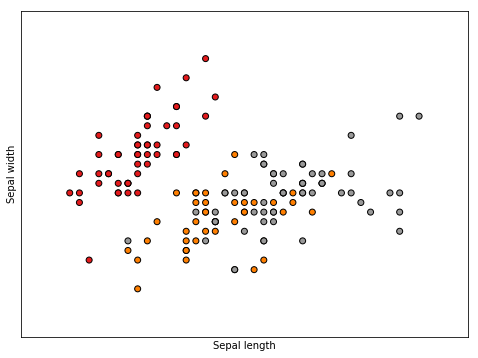

In [3]:
# plot the dataset so that we can look at its organization
# same plot as made in http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
X = x_train[:, :2]  # we only take the first two features.
y = y_train

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

### Perceptron

Vamos implementar um simples perceptron

In [41]:
# import relevant classes from keras
from keras.layers import Input, Dense as HiddenLayer, Dense as OutputLayer
from keras.models import Model

# our input placeholder
data_input = Input(shape=(4,))

# the output with one neuron for each class
output = OutputLayer(3, activation='sigmoid')(data_input)

# wrap up the model
perceptron = Model(data_input, output)

perceptron.compile(optimizer='sgd', loss='binary_crossentropy')

Queremos nossa saída, nossas labels, em formato binário, precisamos converte-la

In [42]:
# we can use keras' helper to convert from discrete numerical to binary labels
print("Before: ", y_train)
y_train_binary = keras.utils.to_categorical(y_train)
print("After: ", y_train_binary)

Before:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
After:  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 

Treinar com nossos dados de treinamento:

In [43]:
perceptron.fit(
    x_train, y_train_binary,
    epochs=1000,
    batch_size=50,
    shuffle=True
)

Epoch 1/1000
150/150 [==============================] - 0s 2ms/step - loss: 1.2871
Epoch 2/1000
150/150 [==============================] - 0s 153us/step - loss: 1.2368
Epoch 3/1000
150/150 [==============================] - 0s 105us/step - loss: 1.1898
Epoch 4/1000
150/150 [==============================] - 0s 111us/step - loss: 1.1462
Epoch 5/1000
150/150 [==============================] - 0s 102us/step - loss: 1.1061
Epoch 6/1000
150/150 [==============================] - 0s 109us/step - loss: 1.0696
Epoch 7/1000
150/150 [==============================] - 0s 110us/step - loss: 1.0362
Epoch 8/1000
150/150 [==============================] - 0s 73us/step - loss: 1.0057
Epoch 9/1000
150/150 [==============================] - 0s 98us/step - loss: 0.9788
Epoch 10/1000
150/150 [==============================] - 0s 88us/step - loss: 0.9532
Epoch 11/1000
150/150 [==============================] - 0s 59us/step - loss: 0.9300
Epoch 12/1000
150/150 [==============================] - 0s 83us/step

150/150 [==============================] - 0s 82us/step - loss: 0.4668
Epoch 98/1000
150/150 [==============================] - 0s 83us/step - loss: 0.4656
Epoch 99/1000
150/150 [==============================] - 0s 69us/step - loss: 0.4652
Epoch 100/1000
150/150 [==============================] - 0s 97us/step - loss: 0.4640
Epoch 101/1000
150/150 [==============================] - 0s 67us/step - loss: 0.4634
Epoch 102/1000
150/150 [==============================] - 0s 99us/step - loss: 0.4628
Epoch 103/1000
150/150 [==============================] - 0s 114us/step - loss: 0.4616
Epoch 104/1000
150/150 [==============================] - 0s 86us/step - loss: 0.4610
Epoch 105/1000
150/150 [==============================] - 0s 87us/step - loss: 0.4602
Epoch 106/1000
150/150 [==============================] - 0s 144us/step - loss: 0.4594
Epoch 107/1000
150/150 [==============================] - 0s 74us/step - loss: 0.4586
Epoch 108/1000
150/150 [==============================] - 0s 74us/ste

150/150 [==============================] - 0s 89us/step - loss: 0.4102
Epoch 193/1000
150/150 [==============================] - 0s 92us/step - loss: 0.4100
Epoch 194/1000
150/150 [==============================] - 0s 90us/step - loss: 0.4096
Epoch 195/1000
150/150 [==============================] - 0s 80us/step - loss: 0.4089
Epoch 196/1000
150/150 [==============================] - 0s 90us/step - loss: 0.4085
Epoch 197/1000
150/150 [==============================] - 0s 82us/step - loss: 0.4081
Epoch 198/1000
150/150 [==============================] - 0s 83us/step - loss: 0.4076
Epoch 199/1000
150/150 [==============================] - 0s 75us/step - loss: 0.4072
Epoch 200/1000
150/150 [==============================] - 0s 90us/step - loss: 0.4072
Epoch 201/1000
150/150 [==============================] - 0s 70us/step - loss: 0.4065
Epoch 202/1000
150/150 [==============================] - 0s 80us/step - loss: 0.4063
Epoch 203/1000
150/150 [==============================] - 0s 70us/ste

150/150 [==============================] - 0s 88us/step - loss: 0.3792
Epoch 288/1000
150/150 [==============================] - 0s 78us/step - loss: 0.3789
Epoch 289/1000
150/150 [==============================] - 0s 89us/step - loss: 0.3787
Epoch 290/1000
150/150 [==============================] - 0s 77us/step - loss: 0.3784
Epoch 291/1000
150/150 [==============================] - 0s 95us/step - loss: 0.3783
Epoch 292/1000
150/150 [==============================] - 0s 103us/step - loss: 0.3780
Epoch 293/1000
150/150 [==============================] - 0s 91us/step - loss: 0.3777
Epoch 294/1000
150/150 [==============================] - 0s 98us/step - loss: 0.3776
Epoch 295/1000
150/150 [==============================] - 0s 89us/step - loss: 0.3772
Epoch 296/1000
150/150 [==============================] - 0s 76us/step - loss: 0.3770
Epoch 297/1000
150/150 [==============================] - 0s 96us/step - loss: 0.3770
Epoch 298/1000
150/150 [==============================] - 0s 84us/st

150/150 [==============================] - 0s 113us/step - loss: 0.3595
Epoch 383/1000
150/150 [==============================] - 0s 88us/step - loss: 0.3594
Epoch 384/1000
150/150 [==============================] - 0s 121us/step - loss: 0.3592
Epoch 385/1000
150/150 [==============================] - 0s 79us/step - loss: 0.3591
Epoch 386/1000
150/150 [==============================] - 0s 88us/step - loss: 0.3589
Epoch 387/1000
150/150 [==============================] - 0s 87us/step - loss: 0.3587
Epoch 388/1000
150/150 [==============================] - 0s 112us/step - loss: 0.3585
Epoch 389/1000
150/150 [==============================] - 0s 153us/step - loss: 0.3583
Epoch 390/1000
150/150 [==============================] - 0s 121us/step - loss: 0.3582
Epoch 391/1000
150/150 [==============================] - 0s 94us/step - loss: 0.3584
Epoch 392/1000
150/150 [==============================] - 0s 83us/step - loss: 0.3579
Epoch 393/1000
150/150 [==============================] - 0s 71u

150/150 [==============================] - 0s 84us/step - loss: 0.3457
Epoch 478/1000
150/150 [==============================] - 0s 101us/step - loss: 0.3455
Epoch 479/1000
150/150 [==============================] - 0s 68us/step - loss: 0.3455
Epoch 480/1000
150/150 [==============================] - 0s 76us/step - loss: 0.3454
Epoch 481/1000
150/150 [==============================] - 0s 97us/step - loss: 0.3453
Epoch 482/1000
150/150 [==============================] - 0s 92us/step - loss: 0.3452
Epoch 483/1000
150/150 [==============================] - 0s 117us/step - loss: 0.3458
Epoch 484/1000
150/150 [==============================] - 0s 60us/step - loss: 0.3450
Epoch 485/1000
150/150 [==============================] - 0s 100us/step - loss: 0.3448
Epoch 486/1000
150/150 [==============================] - 0s 84us/step - loss: 0.3445
Epoch 487/1000
150/150 [==============================] - 0s 80us/step - loss: 0.3447
Epoch 488/1000
150/150 [==============================] - 0s 71us/

150/150 [==============================] - 0s 114us/step - loss: 0.3353
Epoch 573/1000
150/150 [==============================] - 0s 103us/step - loss: 0.3355
Epoch 574/1000
150/150 [==============================] - 0s 134us/step - loss: 0.3350
Epoch 575/1000
150/150 [==============================] - 0s 105us/step - loss: 0.3352
Epoch 576/1000
150/150 [==============================] - 0s 87us/step - loss: 0.3349
Epoch 577/1000
150/150 [==============================] - 0s 95us/step - loss: 0.3350
Epoch 578/1000
150/150 [==============================] - 0s 121us/step - loss: 0.3347
Epoch 579/1000
150/150 [==============================] - 0s 102us/step - loss: 0.3345
Epoch 580/1000
150/150 [==============================] - 0s 81us/step - loss: 0.3344
Epoch 581/1000
150/150 [==============================] - 0s 92us/step - loss: 0.3343
Epoch 582/1000
150/150 [==============================] - 0s 76us/step - loss: 0.3346
Epoch 583/1000
150/150 [==============================] - 0s 94

150/150 [==============================] - 0s 63us/step - loss: 0.3268
Epoch 668/1000
150/150 [==============================] - 0s 66us/step - loss: 0.3270
Epoch 669/1000
150/150 [==============================] - 0s 74us/step - loss: 0.3267
Epoch 670/1000
150/150 [==============================] - 0s 80us/step - loss: 0.3266
Epoch 671/1000
150/150 [==============================] - 0s 95us/step - loss: 0.3268
Epoch 672/1000
150/150 [==============================] - 0s 142us/step - loss: 0.3264
Epoch 673/1000
150/150 [==============================] - 0s 115us/step - loss: 0.3265
Epoch 674/1000
150/150 [==============================] - 0s 81us/step - loss: 0.3263
Epoch 675/1000
150/150 [==============================] - 0s 98us/step - loss: 0.3261
Epoch 676/1000
150/150 [==============================] - 0s 108us/step - loss: 0.3261
Epoch 677/1000
150/150 [==============================] - 0s 125us/step - loss: 0.3262
Epoch 678/1000
150/150 [==============================] - 0s 81us

150/150 [==============================] - 0s 91us/step - loss: 0.3200
Epoch 763/1000
150/150 [==============================] - 0s 78us/step - loss: 0.3199
Epoch 764/1000
150/150 [==============================] - 0s 81us/step - loss: 0.3202
Epoch 765/1000
150/150 [==============================] - 0s 88us/step - loss: 0.3197
Epoch 766/1000
150/150 [==============================] - 0s 77us/step - loss: 0.3202
Epoch 767/1000
150/150 [==============================] - 0s 80us/step - loss: 0.3195
Epoch 768/1000
150/150 [==============================] - 0s 89us/step - loss: 0.3199
Epoch 769/1000
150/150 [==============================] - 0s 69us/step - loss: 0.3195
Epoch 770/1000
150/150 [==============================] - 0s 108us/step - loss: 0.3194
Epoch 771/1000
150/150 [==============================] - 0s 72us/step - loss: 0.3193
Epoch 772/1000
150/150 [==============================] - 0s 77us/step - loss: 0.3192
Epoch 773/1000
150/150 [==============================] - 0s 64us/st

150/150 [==============================] - 0s 58us/step - loss: 0.3139
Epoch 858/1000
150/150 [==============================] - 0s 80us/step - loss: 0.3140
Epoch 859/1000
150/150 [==============================] - 0s 84us/step - loss: 0.3138
Epoch 860/1000
150/150 [==============================] - 0s 85us/step - loss: 0.3141
Epoch 861/1000
150/150 [==============================] - 0s 140us/step - loss: 0.3137
Epoch 862/1000
150/150 [==============================] - 0s 83us/step - loss: 0.3137
Epoch 863/1000
150/150 [==============================] - 0s 91us/step - loss: 0.3136
Epoch 864/1000
150/150 [==============================] - 0s 95us/step - loss: 0.3135
Epoch 865/1000
150/150 [==============================] - 0s 93us/step - loss: 0.3136
Epoch 866/1000
150/150 [==============================] - 0s 80us/step - loss: 0.3134
Epoch 867/1000
150/150 [==============================] - 0s 83us/step - loss: 0.3134
Epoch 868/1000
150/150 [==============================] - 0s 93us/st

150/150 [==============================] - 0s 95us/step - loss: 0.3087
Epoch 953/1000
150/150 [==============================] - 0s 74us/step - loss: 0.3087
Epoch 954/1000
150/150 [==============================] - 0s 75us/step - loss: 0.3087
Epoch 955/1000
150/150 [==============================] - 0s 84us/step - loss: 0.3086
Epoch 956/1000
150/150 [==============================] - 0s 94us/step - loss: 0.3085
Epoch 957/1000
150/150 [==============================] - 0s 76us/step - loss: 0.3089
Epoch 958/1000
150/150 [==============================] - 0s 101us/step - loss: 0.3085
Epoch 959/1000
150/150 [==============================] - 0s 93us/step - loss: 0.3086
Epoch 960/1000
150/150 [==============================] - 0s 113us/step - loss: 0.3083
Epoch 961/1000
150/150 [==============================] - 0s 103us/step - loss: 0.3084
Epoch 962/1000
150/150 [==============================] - 0s 107us/step - loss: 0.3083
Epoch 963/1000
150/150 [==============================] - 0s 102u

E agora podemos calcular como foi nosso risco empírico após o treinamento:

In [44]:
predicted = np.argmax(perceptron.predict(x_train), axis=1)
expected = np.where(y_train_binary == 1)[1]
zero_one_loss = predicted != expected
risk = np.sum(zero_one_loss)/len(x_train)
print("Empirical Risk: ", risk)

Empirical Risk:  0.10666666666666667


### Multi-layer Perceptron

In [29]:
# input placeholder
data_input = Input(shape=(4,))

# a hidden layer with 10 neurons
hidden_output = HiddenLayer(10, activation='sigmoid')(data_input)

# another hidden layer with 10 neurons
hidden_output = HiddenLayer(10, activation='sigmoid')(hidden_output)

# the output with its single neuron
output = OutputLayer(3, activation='softmax')(hidden_output)

# wrap up the model
mlp = Model(data_input, output)
mlp.compile(optimizer='sgd', loss='binary_crossentropy')

Treinar com nossos dados de treinamento:

In [32]:
mlp.fit(
    x_train, y_train_binary,
    epochs=2500,
    batch_size=50,
    shuffle=True
)

Epoch 1/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1721
Epoch 2/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1720
Epoch 3/5000
150/150 [==============================] - 0s 86us/step - loss: 0.1719
Epoch 4/5000
150/150 [==============================] - 0s 79us/step - loss: 0.1719
Epoch 5/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1718
Epoch 6/5000
150/150 [==============================] - 0s 73us/step - loss: 0.1724
Epoch 7/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1719
Epoch 8/5000
150/150 [==============================] - 0s 83us/step - loss: 0.1717
Epoch 9/5000
150/150 [==============================] - 0s 92us/step - loss: 0.1717
Epoch 10/5000
150/150 [==============================] - 0s 82us/step - loss: 0.1716
Epoch 11/5000
150/150 [==============================] - 0s 75us/step - loss: 0.1717
Epoch 12/5000
150/150 [==============================] - 0s 92us/step - l

150/150 [==============================] - 0s 81us/step - loss: 0.1680
Epoch 98/5000
150/150 [==============================] - 0s 82us/step - loss: 0.1680
Epoch 99/5000
150/150 [==============================] - 0s 193us/step - loss: 0.1679
Epoch 100/5000
150/150 [==============================] - 0s 83us/step - loss: 0.1679
Epoch 101/5000
150/150 [==============================] - 0s 82us/step - loss: 0.1678
Epoch 102/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1678
Epoch 103/5000
150/150 [==============================] - 0s 80us/step - loss: 0.1678
Epoch 104/5000
150/150 [==============================] - 0s 83us/step - loss: 0.1677
Epoch 105/5000
150/150 [==============================] - 0s 82us/step - loss: 0.1677
Epoch 106/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1676
Epoch 107/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1677
Epoch 108/5000
150/150 [==============================] - 0s 86us/step

150/150 [==============================] - 0s 93us/step - loss: 0.1642
Epoch 193/5000
150/150 [==============================] - 0s 75us/step - loss: 0.1641
Epoch 194/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1641
Epoch 195/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1640
Epoch 196/5000
150/150 [==============================] - 0s 73us/step - loss: 0.1640
Epoch 197/5000
150/150 [==============================] - 0s 74us/step - loss: 0.1640
Epoch 198/5000
150/150 [==============================] - 0s 91us/step - loss: 0.1639
Epoch 199/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1639
Epoch 200/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1638
Epoch 201/5000
150/150 [==============================] - 0s 101us/step - loss: 0.1638
Epoch 202/5000
150/150 [==============================] - 0s 106us/step - loss: 0.1640
Epoch 203/5000
150/150 [==============================] - 0s 107us

150/150 [==============================] - 0s 114us/step - loss: 0.1605
Epoch 287/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1605
Epoch 288/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1605
Epoch 289/5000
150/150 [==============================] - 0s 90us/step - loss: 0.1604
Epoch 290/5000
150/150 [==============================] - 0s 83us/step - loss: 0.1606
Epoch 291/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1605
Epoch 292/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1603
Epoch 293/5000
150/150 [==============================] - 0s 132us/step - loss: 0.1603
Epoch 294/5000
150/150 [==============================] - 0s 117us/step - loss: 0.1603
Epoch 295/5000
150/150 [==============================] - 0s 111us/step - loss: 0.1602
Epoch 296/5000
150/150 [==============================] - 0s 120us/step - loss: 0.1601
Epoch 297/5000
150/150 [==============================] - 0s 96

Epoch 381/5000
150/150 [==============================] - 0s 101us/step - loss: 0.1569
Epoch 382/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1572
Epoch 383/5000
150/150 [==============================] - 0s 110us/step - loss: 0.1569
Epoch 384/5000
150/150 [==============================] - 0s 146us/step - loss: 0.1568
Epoch 385/5000
150/150 [==============================] - 0s 112us/step - loss: 0.1568
Epoch 386/5000
150/150 [==============================] - 0s 143us/step - loss: 0.1568
Epoch 387/5000
150/150 [==============================] - 0s 124us/step - loss: 0.1568
Epoch 388/5000
150/150 [==============================] - ETA: 0s - loss: 0.157 - 0s 171us/step - loss: 0.1568
Epoch 389/5000
150/150 [==============================] - 0s 91us/step - loss: 0.1568
Epoch 390/5000
150/150 [==============================] - 0s 141us/step - loss: 0.1567
Epoch 391/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1568
Epoch 392/5000
150/150

150/150 [==============================] - 0s 93us/step - loss: 0.1536
Epoch 475/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1535
Epoch 476/5000
150/150 [==============================] - 0s 93us/step - loss: 0.1535
Epoch 477/5000
150/150 [==============================] - 0s 81us/step - loss: 0.1536
Epoch 478/5000
150/150 [==============================] - 0s 85us/step - loss: 0.1534
Epoch 479/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1534
Epoch 480/5000
150/150 [==============================] - 0s 93us/step - loss: 0.1533
Epoch 481/5000
150/150 [==============================] - 0s 93us/step - loss: 0.1535
Epoch 482/5000
150/150 [==============================] - 0s 109us/step - loss: 0.1533
Epoch 483/5000
150/150 [==============================] - 0s 96us/step - loss: 0.1536
Epoch 484/5000
150/150 [==============================] - 0s 119us/step - loss: 0.1532
Epoch 485/5000
150/150 [==============================] - 0s 131us

150/150 [==============================] - 0s 138us/step - loss: 0.1503
Epoch 569/5000
150/150 [==============================] - 0s 124us/step - loss: 0.1503
Epoch 570/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1504
Epoch 571/5000
150/150 [==============================] - 0s 92us/step - loss: 0.1502
Epoch 572/5000
150/150 [==============================] - 0s 112us/step - loss: 0.1501
Epoch 573/5000
150/150 [==============================] - 0s 126us/step - loss: 0.1502
Epoch 574/5000
150/150 [==============================] - 0s 118us/step - loss: 0.1501
Epoch 575/5000
150/150 [==============================] - 0s 120us/step - loss: 0.1500
Epoch 576/5000
150/150 [==============================] - 0s 108us/step - loss: 0.1500
Epoch 577/5000
150/150 [==============================] - 0s 106us/step - loss: 0.1501
Epoch 578/5000
150/150 [==============================] - 0s 153us/step - loss: 0.1499
Epoch 579/5000
150/150 [==============================] - 0s

150/150 [==============================] - 0s 96us/step - loss: 0.1472
Epoch 663/5000
150/150 [==============================] - 0s 81us/step - loss: 0.1471
Epoch 664/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1470
Epoch 665/5000
150/150 [==============================] - 0s 86us/step - loss: 0.1472
Epoch 666/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1471
Epoch 667/5000
150/150 [==============================] - 0s 79us/step - loss: 0.1470
Epoch 668/5000
150/150 [==============================] - 0s 125us/step - loss: 0.1469
Epoch 669/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1469
Epoch 670/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1477
Epoch 671/5000
150/150 [==============================] - 0s 128us/step - loss: 0.1469
Epoch 672/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1469
Epoch 673/5000
150/150 [==============================] - 0s 96us/s

150/150 [==============================] - 0s 120us/step - loss: 0.1441
Epoch 757/5000
150/150 [==============================] - 0s 122us/step - loss: 0.1442
Epoch 758/5000
150/150 [==============================] - 0s 140us/step - loss: 0.1442
Epoch 759/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1440
Epoch 760/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1440
Epoch 761/5000
150/150 [==============================] - 0s 104us/step - loss: 0.1441
Epoch 762/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1439
Epoch 763/5000
150/150 [==============================] - 0s 129us/step - loss: 0.1438
Epoch 764/5000
150/150 [==============================] - 0s 135us/step - loss: 0.1439
Epoch 765/5000
150/150 [==============================] - 0s 117us/step - loss: 0.1440
Epoch 766/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1438
Epoch 767/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 85us/step - loss: 0.1411
Epoch 851/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1412
Epoch 852/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1411
Epoch 853/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1412
Epoch 854/5000
150/150 [==============================] - 0s 81us/step - loss: 0.1411
Epoch 855/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1409
Epoch 856/5000
150/150 [==============================] - 0s 82us/step - loss: 0.1409
Epoch 857/5000
150/150 [==============================] - 0s 102us/step - loss: 0.1409
Epoch 858/5000
150/150 [==============================] - 0s 96us/step - loss: 0.1408
Epoch 859/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1408
Epoch 860/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1409
Epoch 861/5000
150/150 [==============================] - 0s 73us/st

150/150 [==============================] - 0s 157us/step - loss: 0.1388
Epoch 945/5000
150/150 [==============================] - 0s 206us/step - loss: 0.1382
Epoch 946/5000
150/150 [==============================] - 0s 151us/step - loss: 0.1384
Epoch 947/5000
150/150 [==============================] - 0s 104us/step - loss: 0.1381
Epoch 948/5000
150/150 [==============================] - 0s 114us/step - loss: 0.1382
Epoch 949/5000
150/150 [==============================] - 0s 110us/step - loss: 0.1382
Epoch 950/5000
150/150 [==============================] - 0s 136us/step - loss: 0.1380
Epoch 951/5000
150/150 [==============================] - 0s 115us/step - loss: 0.1381
Epoch 952/5000
150/150 [==============================] - 0s 114us/step - loss: 0.1383
Epoch 953/5000
150/150 [==============================] - 0s 118us/step - loss: 0.1380
Epoch 954/5000
150/150 [==============================] - 0s 141us/step - loss: 0.1380
Epoch 955/5000
150/150 [==============================] - 

150/150 [==============================] - 0s 108us/step - loss: 0.1354
Epoch 1039/5000
150/150 [==============================] - 0s 109us/step - loss: 0.1355
Epoch 1040/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1355
Epoch 1041/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1354
Epoch 1042/5000
150/150 [==============================] - 0s 104us/step - loss: 0.1353
Epoch 1043/5000
150/150 [==============================] - 0s 132us/step - loss: 0.1355
Epoch 1044/5000
150/150 [==============================] - 0s 115us/step - loss: 0.1353
Epoch 1045/5000
150/150 [==============================] - 0s 116us/step - loss: 0.1353
Epoch 1046/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1353
Epoch 1047/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1353
Epoch 1048/5000
150/150 [==============================] - 0s 115us/step - loss: 0.1352
Epoch 1049/5000
150/150 [==========================

150/150 [==============================] - 0s 77us/step - loss: 0.1328
Epoch 1132/5000
150/150 [==============================] - 0s 79us/step - loss: 0.1330
Epoch 1133/5000
150/150 [==============================] - 0s 96us/step - loss: 0.1329
Epoch 1134/5000
150/150 [==============================] - 0s 112us/step - loss: 0.1327
Epoch 1135/5000
150/150 [==============================] - 0s 125us/step - loss: 0.1333
Epoch 1136/5000
150/150 [==============================] - 0s 113us/step - loss: 0.1327
Epoch 1137/5000
150/150 [==============================] - ETA: 0s - loss: 0.152 - 0s 113us/step - loss: 0.1327
Epoch 1138/5000
150/150 [==============================] - 0s 128us/step - loss: 0.1326
Epoch 1139/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1326
Epoch 1140/5000
150/150 [==============================] - 0s 119us/step - loss: 0.1327
Epoch 1141/5000
150/150 [==============================] - 0s 92us/step - loss: 0.1325
Epoch 1142/5000
150/150 [====

150/150 [==============================] - 0s 136us/step - loss: 0.1303
Epoch 1225/5000
150/150 [==============================] - 0s 175us/step - loss: 0.1304
Epoch 1226/5000
150/150 [==============================] - 0s 129us/step - loss: 0.1301
Epoch 1227/5000
150/150 [==============================] - 0s 123us/step - loss: 0.1302
Epoch 1228/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1301
Epoch 1229/5000
150/150 [==============================] - 0s 117us/step - loss: 0.1301
Epoch 1230/5000
150/150 [==============================] - 0s 115us/step - loss: 0.1300
Epoch 1231/5000
150/150 [==============================] - 0s 101us/step - loss: 0.1301
Epoch 1232/5000
150/150 [==============================] - 0s 100us/step - loss: 0.1301
Epoch 1233/5000
150/150 [==============================] - 0s 115us/step - loss: 0.1300
Epoch 1234/5000
150/150 [==============================] - 0s 108us/step - loss: 0.1300
Epoch 1235/5000
150/150 [=======================

150/150 [==============================] - 0s 133us/step - loss: 0.1277
Epoch 1318/5000
150/150 [==============================] - 0s 90us/step - loss: 0.1277
Epoch 1319/5000
150/150 [==============================] - 0s 112us/step - loss: 0.1277
Epoch 1320/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1277
Epoch 1321/5000
150/150 [==============================] - 0s 117us/step - loss: 0.1276
Epoch 1322/5000
150/150 [==============================] - 0s 81us/step - loss: 0.1277
Epoch 1323/5000
150/150 [==============================] - 0s 118us/step - loss: 0.1277
Epoch 1324/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1276
Epoch 1325/5000
150/150 [==============================] - 0s 120us/step - loss: 0.1275
Epoch 1326/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1276
Epoch 1327/5000
150/150 [==============================] - 0s 96us/step - loss: 0.1276
Epoch 1328/5000
150/150 [============================

150/150 [==============================] - 0s 137us/step - loss: 0.1253
Epoch 1411/5000
150/150 [==============================] - 0s 117us/step - loss: 0.1253
Epoch 1412/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1253
Epoch 1413/5000
150/150 [==============================] - 0s 109us/step - loss: 0.1252
Epoch 1414/5000
150/150 [==============================] - 0s 111us/step - loss: 0.1255
Epoch 1415/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1253
Epoch 1416/5000
150/150 [==============================] - 0s 107us/step - loss: 0.1252
Epoch 1417/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1252
Epoch 1418/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1253
Epoch 1419/5000
150/150 [==============================] - 0s 123us/step - loss: 0.1253
Epoch 1420/5000
150/150 [==============================] - 0s 114us/step - loss: 0.1251
Epoch 1421/5000
150/150 [=========================

150/150 [==============================] - 0s 158us/step - loss: 0.1230
Epoch 1503/5000
150/150 [==============================] - 0s 126us/step - loss: 0.1230
Epoch 1504/5000
150/150 [==============================] - 0s 104us/step - loss: 0.1229
Epoch 1505/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1229
Epoch 1506/5000
150/150 [==============================] - 0s 92us/step - loss: 0.1231
Epoch 1507/5000
150/150 [==============================] - 0s 120us/step - loss: 0.1229
Epoch 1508/5000
150/150 [==============================] - 0s 147us/step - loss: 0.1229
Epoch 1509/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1231
Epoch 1510/5000
150/150 [==============================] - 0s 118us/step - loss: 0.1230
Epoch 1511/5000
150/150 [==============================] - 0s 107us/step - loss: 0.1229
Epoch 1512/5000
150/150 [==============================] - 0s 123us/step - loss: 0.1228
Epoch 1513/5000
150/150 [=========================

150/150 [==============================] - 0s 90us/step - loss: 0.1209
Epoch 1596/5000
150/150 [==============================] - 0s 116us/step - loss: 0.1207
Epoch 1597/5000
150/150 [==============================] - 0s 83us/step - loss: 0.1209
Epoch 1598/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1207
Epoch 1599/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1209
Epoch 1600/5000
150/150 [==============================] - 0s 107us/step - loss: 0.1207
Epoch 1601/5000
150/150 [==============================] - 0s 78us/step - loss: 0.1206
Epoch 1602/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1206
Epoch 1603/5000
150/150 [==============================] - 0s 91us/step - loss: 0.1207
Epoch 1604/5000
150/150 [==============================] - 0s 106us/step - loss: 0.1207
Epoch 1605/5000
150/150 [==============================] - 0s 109us/step - loss: 0.1205
Epoch 1606/5000
150/150 [=============================

150/150 [==============================] - 0s 94us/step - loss: 0.1189
Epoch 1689/5000
150/150 [==============================] - 0s 108us/step - loss: 0.1188
Epoch 1690/5000
150/150 [==============================] - 0s 107us/step - loss: 0.1186
Epoch 1691/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1186
Epoch 1692/5000
150/150 [==============================] - 0s 102us/step - loss: 0.1185
Epoch 1693/5000
150/150 [==============================] - 0s 109us/step - loss: 0.1185
Epoch 1694/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1185
Epoch 1695/5000
150/150 [==============================] - 0s 116us/step - loss: 0.1185
Epoch 1696/5000
150/150 [==============================] - 0s 91us/step - loss: 0.1184
Epoch 1697/5000
150/150 [==============================] - 0s 90us/step - loss: 0.1185
Epoch 1698/5000
150/150 [==============================] - 0s 134us/step - loss: 0.1183
Epoch 1699/5000
150/150 [============================

150/150 [==============================] - 0s 109us/step - loss: 0.1165
Epoch 1782/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1164
Epoch 1783/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1164
Epoch 1784/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1165
Epoch 1785/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1163
Epoch 1786/5000
150/150 [==============================] - 0s 106us/step - loss: 0.1164
Epoch 1787/5000
150/150 [==============================] - 0s 84us/step - loss: 0.1165
Epoch 1788/5000
150/150 [==============================] - 0s 87us/step - loss: 0.1164
Epoch 1789/5000
150/150 [==============================] - 0s 116us/step - loss: 0.1164
Epoch 1790/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1163
Epoch 1791/5000
150/150 [==============================] - 0s 110us/step - loss: 0.1162
Epoch 1792/5000
150/150 [==============================

150/150 [==============================] - 0s 85us/step - loss: 0.1145
Epoch 1875/5000
150/150 [==============================] - 0s 127us/step - loss: 0.1144
Epoch 1876/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1146
Epoch 1877/5000
150/150 [==============================] - 0s 117us/step - loss: 0.1144
Epoch 1878/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1144
Epoch 1879/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1142
Epoch 1880/5000
150/150 [==============================] - 0s 97us/step - loss: 0.1142
Epoch 1881/5000
150/150 [==============================] - 0s 110us/step - loss: 0.1142
Epoch 1882/5000
150/150 [==============================] - 0s 91us/step - loss: 0.1144
Epoch 1883/5000
150/150 [==============================] - 0s 114us/step - loss: 0.1142
Epoch 1884/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1144
Epoch 1885/5000
150/150 [=============================

150/150 [==============================] - 0s 139us/step - loss: 0.1126
Epoch 1968/5000
150/150 [==============================] - 0s 118us/step - loss: 0.1124
Epoch 1969/5000
150/150 [==============================] - 0s 116us/step - loss: 0.1124
Epoch 1970/5000
150/150 [==============================] - 0s 107us/step - loss: 0.1123
Epoch 1971/5000
150/150 [==============================] - 0s 172us/step - loss: 0.1124
Epoch 1972/5000
150/150 [==============================] - 0s 83us/step - loss: 0.1122
Epoch 1973/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1124
Epoch 1974/5000
150/150 [==============================] - 0s 109us/step - loss: 0.1123
Epoch 1975/5000
150/150 [==============================] - 0s 122us/step - loss: 0.1123
Epoch 1976/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1122
Epoch 1977/5000
150/150 [==============================] - 0s 122us/step - loss: 0.1122
Epoch 1978/5000
150/150 [=========================

150/150 [==============================] - 0s 92us/step - loss: 0.1105
Epoch 2061/5000
150/150 [==============================] - 0s 108us/step - loss: 0.1106
Epoch 2062/5000
150/150 [==============================] - 0s 79us/step - loss: 0.1106
Epoch 2063/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1105
Epoch 2064/5000
150/150 [==============================] - 0s 142us/step - loss: 0.1104
Epoch 2065/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1106
Epoch 2066/5000
150/150 [==============================] - 0s 155us/step - loss: 0.1103
Epoch 2067/5000
150/150 [==============================] - 0s 174us/step - loss: 0.1103
Epoch 2068/5000
150/150 [==============================] - 0s 111us/step - loss: 0.1103
Epoch 2069/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1104
Epoch 2070/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1103
Epoch 2071/5000
150/150 [==========================

150/150 [==============================] - 0s 94us/step - loss: 0.1086
Epoch 2154/5000
150/150 [==============================] - 0s 116us/step - loss: 0.1085
Epoch 2155/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1087
Epoch 2156/5000
150/150 [==============================] - 0s 133us/step - loss: 0.1085
Epoch 2157/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1085
Epoch 2158/5000
150/150 [==============================] - 0s 81us/step - loss: 0.1087
Epoch 2159/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1084
Epoch 2160/5000
150/150 [==============================] - 0s 81us/step - loss: 0.1085
Epoch 2161/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1086
Epoch 2162/5000
150/150 [==============================] - 0s 108us/step - loss: 0.1084
Epoch 2163/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1085
Epoch 2164/5000
150/150 [=============================

150/150 [==============================] - 0s 117us/step - loss: 0.1070
Epoch 2247/5000
150/150 [==============================] - 0s 119us/step - loss: 0.1069
Epoch 2248/5000
150/150 [==============================] - 0s 120us/step - loss: 0.1068
Epoch 2249/5000
150/150 [==============================] - 0s 133us/step - loss: 0.1068
Epoch 2250/5000
150/150 [==============================] - 0s 95us/step - loss: 0.1069
Epoch 2251/5000
150/150 [==============================] - 0s 93us/step - loss: 0.1069
Epoch 2252/5000
150/150 [==============================] - 0s 125us/step - loss: 0.1066
Epoch 2253/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1067
Epoch 2254/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1067
Epoch 2255/5000
150/150 [==============================] - 0s 118us/step - loss: 0.1067
Epoch 2256/5000
150/150 [==============================] - 0s 103us/step - loss: 0.1065
Epoch 2257/5000
150/150 [===========================

150/150 [==============================] - 0s 104us/step - loss: 0.1050
Epoch 2340/5000
150/150 [==============================] - 0s 93us/step - loss: 0.1051
Epoch 2341/5000
150/150 [==============================] - 0s 115us/step - loss: 0.1050
Epoch 2342/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1049
Epoch 2343/5000
150/150 [==============================] - 0s 104us/step - loss: 0.1050
Epoch 2344/5000
150/150 [==============================] - 0s 105us/step - loss: 0.1051
Epoch 2345/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1049
Epoch 2346/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1049
Epoch 2347/5000
150/150 [==============================] - 0s 110us/step - loss: 0.1048
Epoch 2348/5000
150/150 [==============================] - 0s 85us/step - loss: 0.1048
Epoch 2349/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1051
Epoch 2350/5000
150/150 [=============================

150/150 [==============================] - 0s 111us/step - loss: 0.1034
Epoch 2433/5000
150/150 [==============================] - 0s 96us/step - loss: 0.1033
Epoch 2434/5000
150/150 [==============================] - 0s 137us/step - loss: 0.1034
Epoch 2435/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1032
Epoch 2436/5000
150/150 [==============================] - 0s 94us/step - loss: 0.1033
Epoch 2437/5000
150/150 [==============================] - 0s 108us/step - loss: 0.1032
Epoch 2438/5000
150/150 [==============================] - 0s 131us/step - loss: 0.1033
Epoch 2439/5000
150/150 [==============================] - 0s 148us/step - loss: 0.1033
Epoch 2440/5000
150/150 [==============================] - 0s 165us/step - loss: 0.1031
Epoch 2441/5000
150/150 [==============================] - 0s 317us/step - loss: 0.1031
Epoch 2442/5000
150/150 [==============================] - 0s 126us/step - loss: 0.1034
Epoch 2443/5000
150/150 [==========================

150/150 [==============================] - 0s 172us/step - loss: 0.1017
Epoch 2526/5000
150/150 [==============================] - 0s 179us/step - loss: 0.1016
Epoch 2527/5000
150/150 [==============================] - 0s 132us/step - loss: 0.1019
Epoch 2528/5000
150/150 [==============================] - 0s 154us/step - loss: 0.1017
Epoch 2529/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1016
Epoch 2530/5000
150/150 [==============================] - 0s 89us/step - loss: 0.1015
Epoch 2531/5000
150/150 [==============================] - 0s 102us/step - loss: 0.1015
Epoch 2532/5000
150/150 [==============================] - 0s 111us/step - loss: 0.1017
Epoch 2533/5000
150/150 [==============================] - 0s 81us/step - loss: 0.1015
Epoch 2534/5000
150/150 [==============================] - 0s 110us/step - loss: 0.1017
Epoch 2535/5000
150/150 [==============================] - 0s 91us/step - loss: 0.1014
Epoch 2536/5000
150/150 [===========================

150/150 [==============================] - 0s 105us/step - loss: 0.1000
Epoch 2619/5000
150/150 [==============================] - 0s 99us/step - loss: 0.1000
Epoch 2620/5000
150/150 [==============================] - 0s 112us/step - loss: 0.0999
Epoch 2621/5000
150/150 [==============================] - 0s 114us/step - loss: 0.1001
Epoch 2622/5000
150/150 [==============================] - 0s 98us/step - loss: 0.1001
Epoch 2623/5000
150/150 [==============================] - 0s 100us/step - loss: 0.1001
Epoch 2624/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1000
Epoch 2625/5000
150/150 [==============================] - 0s 88us/step - loss: 0.1000
Epoch 2626/5000
150/150 [==============================] - 0s 114us/step - loss: 0.0999
Epoch 2627/5000
150/150 [==============================] - 0s 113us/step - loss: 0.1000
Epoch 2628/5000
150/150 [==============================] - 0s 98us/step - loss: 0.0998
Epoch 2629/5000
150/150 [============================

150/150 [==============================] - 0s 98us/step - loss: 0.0986
Epoch 2712/5000
150/150 [==============================] - 0s 126us/step - loss: 0.0985
Epoch 2713/5000
150/150 [==============================] - 0s 126us/step - loss: 0.0985
Epoch 2714/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0984
Epoch 2715/5000
150/150 [==============================] - 0s 84us/step - loss: 0.0984
Epoch 2716/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0984
Epoch 2717/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0989
Epoch 2718/5000
150/150 [==============================] - 0s 116us/step - loss: 0.0987
Epoch 2719/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0986
Epoch 2720/5000
150/150 [==============================] - 0s 108us/step - loss: 0.0984
Epoch 2721/5000
150/150 [==============================] - 0s 118us/step - loss: 0.0984
Epoch 2722/5000
150/150 [============================

150/150 [==============================] - 0s 91us/step - loss: 0.0969
Epoch 2805/5000
150/150 [==============================] - 0s 157us/step - loss: 0.0969
Epoch 2806/5000
150/150 [==============================] - 0s 92us/step - loss: 0.0970
Epoch 2807/5000
150/150 [==============================] - 0s 133us/step - loss: 0.0969
Epoch 2808/5000
150/150 [==============================] - 0s 110us/step - loss: 0.0969
Epoch 2809/5000
150/150 [==============================] - 0s 105us/step - loss: 0.0969
Epoch 2810/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0968
Epoch 2811/5000
150/150 [==============================] - 0s 98us/step - loss: 0.0968
Epoch 2812/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0969
Epoch 2813/5000
150/150 [==============================] - 0s 74us/step - loss: 0.0968
Epoch 2814/5000
150/150 [==============================] - 0s 76us/step - loss: 0.0967
Epoch 2815/5000
150/150 [==============================

150/150 [==============================] - 0s 75us/step - loss: 0.0955
Epoch 2899/5000
150/150 [==============================] - 0s 65us/step - loss: 0.0954
Epoch 2900/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0954
Epoch 2901/5000
150/150 [==============================] - 0s 128us/step - loss: 0.0956
Epoch 2902/5000
150/150 [==============================] - 0s 122us/step - loss: 0.0954
Epoch 2903/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0956
Epoch 2904/5000
150/150 [==============================] - 0s 81us/step - loss: 0.0956
Epoch 2905/5000
150/150 [==============================] - 0s 70us/step - loss: 0.0954
Epoch 2906/5000
150/150 [==============================] - 0s 72us/step - loss: 0.0954
Epoch 2907/5000
150/150 [==============================] - 0s 76us/step - loss: 0.0955
Epoch 2908/5000
150/150 [==============================] - 0s 94us/step - loss: 0.0954
Epoch 2909/5000
150/150 [==============================] 

150/150 [==============================] - 0s 96us/step - loss: 0.0944
Epoch 2993/5000
150/150 [==============================] - 0s 84us/step - loss: 0.0943
Epoch 2994/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0943
Epoch 2995/5000
150/150 [==============================] - 0s 72us/step - loss: 0.0941
Epoch 2996/5000
150/150 [==============================] - 0s 78us/step - loss: 0.0941
Epoch 2997/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0941
Epoch 2998/5000
150/150 [==============================] - 0s 114us/step - loss: 0.0939
Epoch 2999/5000
150/150 [==============================] - 0s 102us/step - loss: 0.0939
Epoch 3000/5000
150/150 [==============================] - 0s 133us/step - loss: 0.0941
Epoch 3001/5000
150/150 [==============================] - 0s 90us/step - loss: 0.0939
Epoch 3002/5000
150/150 [==============================] - 0s 98us/step - loss: 0.0943
Epoch 3003/5000
150/150 [==============================]

Epoch 3086/5000
150/150 [==============================] - 0s 95us/step - loss: 0.0926
Epoch 3087/5000
150/150 [==============================] - 0s 79us/step - loss: 0.0926
Epoch 3088/5000
150/150 [==============================] - 0s 101us/step - loss: 0.0926
Epoch 3089/5000
150/150 [==============================] - 0s 74us/step - loss: 0.0926
Epoch 3090/5000
150/150 [==============================] - 0s 129us/step - loss: 0.0926
Epoch 3091/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0925
Epoch 3092/5000
150/150 [==============================] - 0s 75us/step - loss: 0.0926
Epoch 3093/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0926
Epoch 3094/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0927
Epoch 3095/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0927
Epoch 3096/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0925
Epoch 3097/5000
150/150 [===============

150/150 [==============================] - 0s 96us/step - loss: 0.0914
Epoch 3180/5000
150/150 [==============================] - 0s 121us/step - loss: 0.0913
Epoch 3181/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0914
Epoch 3182/5000
150/150 [==============================] - 0s 102us/step - loss: 0.0914
Epoch 3183/5000
150/150 [==============================] - 0s 133us/step - loss: 0.0915
Epoch 3184/5000
150/150 [==============================] - 0s 99us/step - loss: 0.0913
Epoch 3185/5000
150/150 [==============================] - 0s 102us/step - loss: 0.0913
Epoch 3186/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0912
Epoch 3187/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0914
Epoch 3188/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0911
Epoch 3189/5000
150/150 [==============================] - 0s 91us/step - loss: 0.0913
Epoch 3190/5000
150/150 [==============================

150/150 [==============================] - 0s 102us/step - loss: 0.0901
Epoch 3273/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0902
Epoch 3274/5000
150/150 [==============================] - 0s 92us/step - loss: 0.0900
Epoch 3275/5000
150/150 [==============================] - 0s 78us/step - loss: 0.0901
Epoch 3276/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0899
Epoch 3277/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0900
Epoch 3278/5000
150/150 [==============================] - 0s 77us/step - loss: 0.0899
Epoch 3279/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0899
Epoch 3280/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0900
Epoch 3281/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0899
Epoch 3282/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0901
Epoch 3283/5000
150/150 [==============================] 

150/150 [==============================] - 0s 90us/step - loss: 0.0887
Epoch 3367/5000
150/150 [==============================] - 0s 92us/step - loss: 0.0888
Epoch 3368/5000
150/150 [==============================] - 0s 104us/step - loss: 0.0887
Epoch 3369/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0887
Epoch 3370/5000
150/150 [==============================] - 0s 86us/step - loss: 0.0890
Epoch 3371/5000
150/150 [==============================] - 0s 103us/step - loss: 0.0887
Epoch 3372/5000
150/150 [==============================] - 0s 98us/step - loss: 0.0891
Epoch 3373/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0889
Epoch 3374/5000
150/150 [==============================] - 0s 94us/step - loss: 0.0886
Epoch 3375/5000
150/150 [==============================] - 0s 99us/step - loss: 0.0886
Epoch 3376/5000
150/150 [==============================] - 0s 112us/step - loss: 0.0890
Epoch 3377/5000
150/150 [==============================]

150/150 [==============================] - 0s 73us/step - loss: 0.0875
Epoch 3461/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0877
Epoch 3462/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0875
Epoch 3463/5000
150/150 [==============================] - 0s 77us/step - loss: 0.0876
Epoch 3464/5000
150/150 [==============================] - 0s 77us/step - loss: 0.0874
Epoch 3465/5000
150/150 [==============================] - 0s 91us/step - loss: 0.0874
Epoch 3466/5000
150/150 [==============================] - 0s 125us/step - loss: 0.0878
Epoch 3467/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0874
Epoch 3468/5000
150/150 [==============================] - 0s 92us/step - loss: 0.0875
Epoch 3469/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0874
Epoch 3470/5000
150/150 [==============================] - 0s 72us/step - loss: 0.0874
Epoch 3471/5000
150/150 [==============================] -

150/150 [==============================] - 0s 78us/step - loss: 0.0864
Epoch 3555/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0863
Epoch 3556/5000
150/150 [==============================] - 0s 95us/step - loss: 0.0863
Epoch 3557/5000
150/150 [==============================] - 0s 78us/step - loss: 0.0862
Epoch 3558/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0863
Epoch 3559/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0862
Epoch 3560/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0864
Epoch 3561/5000
150/150 [==============================] - 0s 104us/step - loss: 0.0864
Epoch 3562/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0862
Epoch 3563/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0863
Epoch 3564/5000
150/150 [==============================] - 0s 75us/step - loss: 0.0861
Epoch 3565/5000
150/150 [==============================]

150/150 [==============================] - 0s 82us/step - loss: 0.0851
Epoch 3649/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0852
Epoch 3650/5000
150/150 [==============================] - 0s 101us/step - loss: 0.0855
Epoch 3651/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0851
Epoch 3652/5000
150/150 [==============================] - 0s 99us/step - loss: 0.0851
Epoch 3653/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0851
Epoch 3654/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0851
Epoch 3655/5000
150/150 [==============================] - 0s 90us/step - loss: 0.0850
Epoch 3656/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0851
Epoch 3657/5000
150/150 [==============================] - 0s 70us/step - loss: 0.0851
Epoch 3658/5000
150/150 [==============================] - 0s 79us/step - loss: 0.0851
Epoch 3659/5000
150/150 [==============================] -

150/150 [==============================] - 0s 103us/step - loss: 0.0841
Epoch 3742/5000
150/150 [==============================] - 0s 94us/step - loss: 0.0841
Epoch 3743/5000
150/150 [==============================] - 0s 99us/step - loss: 0.0840
Epoch 3744/5000
150/150 [==============================] - 0s 66us/step - loss: 0.0842
Epoch 3745/5000
150/150 [==============================] - 0s 94us/step - loss: 0.0841
Epoch 3746/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0842
Epoch 3747/5000
150/150 [==============================] - 0s 124us/step - loss: 0.0840
Epoch 3748/5000
150/150 [==============================] - 0s 105us/step - loss: 0.0842
Epoch 3749/5000
150/150 [==============================] - 0s 105us/step - loss: 0.0839
Epoch 3750/5000
150/150 [==============================] - 0s 102us/step - loss: 0.0840
Epoch 3751/5000
150/150 [==============================] - 0s 106us/step - loss: 0.0839
Epoch 3752/5000
150/150 [===========================

150/150 [==============================] - 0s 94us/step - loss: 0.0831
Epoch 3836/5000
150/150 [==============================] - 0s 85us/step - loss: 0.0830
Epoch 3837/5000
150/150 [==============================] - 0s 91us/step - loss: 0.0829
Epoch 3838/5000
150/150 [==============================] - 0s 91us/step - loss: 0.0829
Epoch 3839/5000
150/150 [==============================] - 0s 130us/step - loss: 0.0829
Epoch 3840/5000
150/150 [==============================] - 0s 101us/step - loss: 0.0829
Epoch 3841/5000
150/150 [==============================] - 0s 86us/step - loss: 0.0829
Epoch 3842/5000
150/150 [==============================] - 0s 74us/step - loss: 0.0828
Epoch 3843/5000
150/150 [==============================] - 0s 97us/step - loss: 0.0828
Epoch 3844/5000
150/150 [==============================] - 0s 84us/step - loss: 0.0831
Epoch 3845/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0828
Epoch 3846/5000
150/150 [==============================] 

150/150 [==============================] - 0s 109us/step - loss: 0.0819
Epoch 3930/5000
150/150 [==============================] - 0s 108us/step - loss: 0.0818
Epoch 3931/5000
150/150 [==============================] - 0s 111us/step - loss: 0.0818
Epoch 3932/5000
150/150 [==============================] - 0s 72us/step - loss: 0.0818
Epoch 3933/5000
150/150 [==============================] - 0s 122us/step - loss: 0.0819
Epoch 3934/5000
150/150 [==============================] - 0s 76us/step - loss: 0.0818
Epoch 3935/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0818
Epoch 3936/5000
150/150 [==============================] - 0s 117us/step - loss: 0.0819
Epoch 3937/5000
150/150 [==============================] - 0s 91us/step - loss: 0.0819
Epoch 3938/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0817
Epoch 3939/5000
150/150 [==============================] - 0s 84us/step - loss: 0.0817
Epoch 3940/5000
150/150 [=============================

Epoch 4023/5000
150/150 [==============================] - 0s 98us/step - loss: 0.0808
Epoch 4024/5000
150/150 [==============================] - 0s 97us/step - loss: 0.0809
Epoch 4025/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0811
Epoch 4026/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0809
Epoch 4027/5000
150/150 [==============================] - 0s 62us/step - loss: 0.0809
Epoch 4028/5000
150/150 [==============================] - 0s 103us/step - loss: 0.0810
Epoch 4029/5000
150/150 [==============================] - 0s 132us/step - loss: 0.0809
Epoch 4030/5000
150/150 [==============================] - 0s 105us/step - loss: 0.0807
Epoch 4031/5000
150/150 [==============================] - 0s 92us/step - loss: 0.0807
Epoch 4032/5000
150/150 [==============================] - 0s 69us/step - loss: 0.0809
Epoch 4033/5000
150/150 [==============================] - 0s 81us/step - loss: 0.0807
Epoch 4034/5000
150/150 [===============

Epoch 4117/5000
150/150 [==============================] - 0s 76us/step - loss: 0.0798
Epoch 4118/5000
150/150 [==============================] - 0s 92us/step - loss: 0.0799
Epoch 4119/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0800
Epoch 4120/5000
150/150 [==============================] - 0s 70us/step - loss: 0.0800
Epoch 4121/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0799
Epoch 4122/5000
150/150 [==============================] - 0s 98us/step - loss: 0.0797
Epoch 4123/5000
150/150 [==============================] - 0s 108us/step - loss: 0.0797
Epoch 4124/5000
150/150 [==============================] - 0s 140us/step - loss: 0.0798
Epoch 4125/5000
150/150 [==============================] - 0s 76us/step - loss: 0.0797
Epoch 4126/5000
150/150 [==============================] - 0s 67us/step - loss: 0.0798
Epoch 4127/5000
150/150 [==============================] - 0s 78us/step - loss: 0.0798
Epoch 4128/5000
150/150 [================

150/150 [==============================] - 0s 81us/step - loss: 0.0789
Epoch 4211/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0788
Epoch 4212/5000
150/150 [==============================] - 0s 66us/step - loss: 0.0788
Epoch 4213/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0788
Epoch 4214/5000
150/150 [==============================] - 0s 153us/step - loss: 0.0789
Epoch 4215/5000
150/150 [==============================] - 0s 77us/step - loss: 0.0788
Epoch 4216/5000
150/150 [==============================] - 0s 98us/step - loss: 0.0787
Epoch 4217/5000
150/150 [==============================] - 0s 111us/step - loss: 0.0787
Epoch 4218/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0788
Epoch 4219/5000
150/150 [==============================] - 0s 75us/step - loss: 0.0790
Epoch 4220/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0789
Epoch 4221/5000
150/150 [==============================] 

Epoch 4304/5000
150/150 [==============================] - 0s 106us/step - loss: 0.0781
Epoch 4305/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0780
Epoch 4306/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0779
Epoch 4307/5000
150/150 [==============================] - 0s 81us/step - loss: 0.0779
Epoch 4308/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0778
Epoch 4309/5000
150/150 [==============================] - 0s 70us/step - loss: 0.0778
Epoch 4310/5000
150/150 [==============================] - 0s 79us/step - loss: 0.0780
Epoch 4311/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0780
Epoch 4312/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0781
Epoch 4313/5000
150/150 [==============================] - 0s 85us/step - loss: 0.0778
Epoch 4314/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0778
Epoch 4315/5000
150/150 [================

150/150 [==============================] - 0s 96us/step - loss: 0.0770
Epoch 4398/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0770
Epoch 4399/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0771
Epoch 4400/5000
150/150 [==============================] - 0s 84us/step - loss: 0.0771
Epoch 4401/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0770
Epoch 4402/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0773
Epoch 4403/5000
150/150 [==============================] - 0s 77us/step - loss: 0.0770
Epoch 4404/5000
150/150 [==============================] - 0s 90us/step - loss: 0.0771
Epoch 4405/5000
150/150 [==============================] - 0s 108us/step - loss: 0.0770
Epoch 4406/5000
150/150 [==============================] - 0s 108us/step - loss: 0.0770
Epoch 4407/5000
150/150 [==============================] - 0s 109us/step - loss: 0.0770
Epoch 4408/5000
150/150 [==============================]

150/150 [==============================] - 0s 85us/step - loss: 0.0764
Epoch 4492/5000
150/150 [==============================] - 0s 79us/step - loss: 0.0762
Epoch 4493/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0761
Epoch 4494/5000
150/150 [==============================] - 0s 95us/step - loss: 0.0761
Epoch 4495/5000
150/150 [==============================] - 0s 84us/step - loss: 0.0761
Epoch 4496/5000
150/150 [==============================] - 0s 86us/step - loss: 0.0760
Epoch 4497/5000
150/150 [==============================] - 0s 81us/step - loss: 0.0760
Epoch 4498/5000
150/150 [==============================] - 0s 109us/step - loss: 0.0760
Epoch 4499/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0762
Epoch 4500/5000
150/150 [==============================] - 0s 72us/step - loss: 0.0760
Epoch 4501/5000
150/150 [==============================] - 0s 94us/step - loss: 0.0760
Epoch 4502/5000
150/150 [==============================] -

150/150 [==============================] - 0s 92us/step - loss: 0.0752
Epoch 4586/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0754
Epoch 4587/5000
150/150 [==============================] - 0s 99us/step - loss: 0.0754
Epoch 4588/5000
150/150 [==============================] - 0s 83us/step - loss: 0.0752
Epoch 4589/5000
150/150 [==============================] - 0s 78us/step - loss: 0.0752
Epoch 4590/5000
150/150 [==============================] - 0s 75us/step - loss: 0.0752
Epoch 4591/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0756
Epoch 4592/5000
150/150 [==============================] - 0s 102us/step - loss: 0.0755
Epoch 4593/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0752
Epoch 4594/5000
150/150 [==============================] - 0s 68us/step - loss: 0.0754
Epoch 4595/5000
150/150 [==============================] - 0s 71us/step - loss: 0.0752
Epoch 4596/5000
150/150 [==============================] -

Epoch 4679/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0744
Epoch 4680/5000
150/150 [==============================] - 0s 87us/step - loss: 0.0744
Epoch 4681/5000
150/150 [==============================] - 0s 82us/step - loss: 0.0744
Epoch 4682/5000
150/150 [==============================] - 0s 93us/step - loss: 0.0750
Epoch 4683/5000
150/150 [==============================] - 0s 85us/step - loss: 0.0743
Epoch 4684/5000
150/150 [==============================] - 0s 120us/step - loss: 0.0744
Epoch 4685/5000
150/150 [==============================] - 0s 65us/step - loss: 0.0743
Epoch 4686/5000
150/150 [==============================] - 0s 110us/step - loss: 0.0744
Epoch 4687/5000
150/150 [==============================] - 0s 97us/step - loss: 0.0743
Epoch 4688/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0743
Epoch 4689/5000
150/150 [==============================] - 0s 99us/step - loss: 0.0743
Epoch 4690/5000
150/150 [================

150/150 [==============================] - 0s 85us/step - loss: 0.0735
Epoch 4773/5000
150/150 [==============================] - 0s 117us/step - loss: 0.0736
Epoch 4774/5000
150/150 [==============================] - 0s 113us/step - loss: 0.0738
Epoch 4775/5000
150/150 [==============================] - 0s 107us/step - loss: 0.0736
Epoch 4776/5000
150/150 [==============================] - 0s 91us/step - loss: 0.0737
Epoch 4777/5000
150/150 [==============================] - 0s 104us/step - loss: 0.0737
Epoch 4778/5000
150/150 [==============================] - 0s 105us/step - loss: 0.0736
Epoch 4779/5000
150/150 [==============================] - 0s 141us/step - loss: 0.0736
Epoch 4780/5000
150/150 [==============================] - 0s 140us/step - loss: 0.0737
Epoch 4781/5000
150/150 [==============================] - 0s 96us/step - loss: 0.0735
Epoch 4782/5000
150/150 [==============================] - 0s 108us/step - loss: 0.0737
Epoch 4783/5000
150/150 [==========================

150/150 [==============================] - 0s 70us/step - loss: 0.0731
Epoch 4867/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0729
Epoch 4868/5000
150/150 [==============================] - 0s 80us/step - loss: 0.0728
Epoch 4869/5000
150/150 [==============================] - 0s 102us/step - loss: 0.0728
Epoch 4870/5000
150/150 [==============================] - 0s 127us/step - loss: 0.0728
Epoch 4871/5000
150/150 [==============================] - 0s 121us/step - loss: 0.0729
Epoch 4872/5000
150/150 [==============================] - 0s 79us/step - loss: 0.0727
Epoch 4873/5000
150/150 [==============================] - 0s 90us/step - loss: 0.0728
Epoch 4874/5000
150/150 [==============================] - 0s 88us/step - loss: 0.0730
Epoch 4875/5000
150/150 [==============================] - 0s 77us/step - loss: 0.0727
Epoch 4876/5000
150/150 [==============================] - 0s 90us/step - loss: 0.0727
Epoch 4877/5000
150/150 [==============================]

150/150 [==============================] - 0s 82us/step - loss: 0.0720
Epoch 4961/5000
150/150 [==============================] - 0s 73us/step - loss: 0.0722
Epoch 4962/5000
150/150 [==============================] - 0s 77us/step - loss: 0.0720
Epoch 4963/5000
150/150 [==============================] - 0s 81us/step - loss: 0.0720
Epoch 4964/5000
150/150 [==============================] - 0s 81us/step - loss: 0.0719
Epoch 4965/5000
150/150 [==============================] - 0s 115us/step - loss: 0.0720
Epoch 4966/5000
150/150 [==============================] - 0s 90us/step - loss: 0.0720
Epoch 4967/5000
150/150 [==============================] - 0s 89us/step - loss: 0.0720
Epoch 4968/5000
150/150 [==============================] - 0s 100us/step - loss: 0.0720
Epoch 4969/5000
150/150 [==============================] - 0s 81us/step - loss: 0.0722
Epoch 4970/5000
150/150 [==============================] - 0s 86us/step - loss: 0.0721
Epoch 4971/5000
150/150 [==============================] 

E agora podemos calcular como foi nosso risco empírico após o treinamento:

In [45]:
predicted = np.argmax(mlp.predict(x_train), axis=1)
expected = np.where(y_train_binary == 1)[1]
zero_one_loss = predicted != expected
risk = np.sum(zero_one_loss)/len(x_train)
print("Empirical Risk: ", risk)

Empirical Risk:  0.02
